<a href="https://colab.research.google.com/github/kaitken17/colab_stuff/blob/master/Why_simplex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_vals = np.linspace(-2, 2, 100)

losses = np.zeros((len(x_vals),))
deflection = np.zeros((len(x_vals),))
for idx in range(len(x_vals)):
  deflection[idx] = np.tanh(5*x_vals[idx])
  losses[idx] = 1/2*np.linalg.norm(x_vals[idx] - deflection[idx])**2


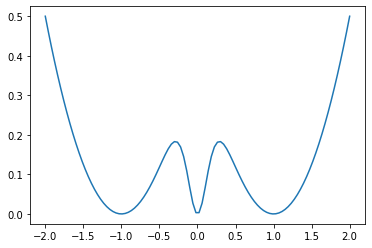

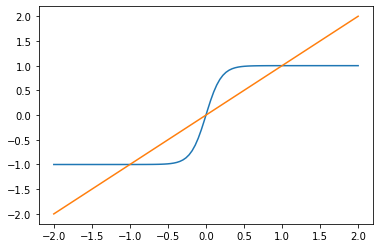

In [ ]:
plt.figure()
plt.plot(x_vals, losses)
plt.figure()
plt.plot(x_vals, deflection)
plt.plot(x_vals, x_vals)

bs shape (1, 2)
[ 0.          0.07071068  0.14142136  0.21213203  0.28284271  0.35355339
  0.42426407  0.49497475  0.56568542  0.6363961   0.70710678 -0.07071068
 -0.14142136 -0.21213203 -0.28284271 -0.35355339 -0.42426407 -0.49497475
 -0.56568542 -0.6363961  -0.70710678]
(21,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10


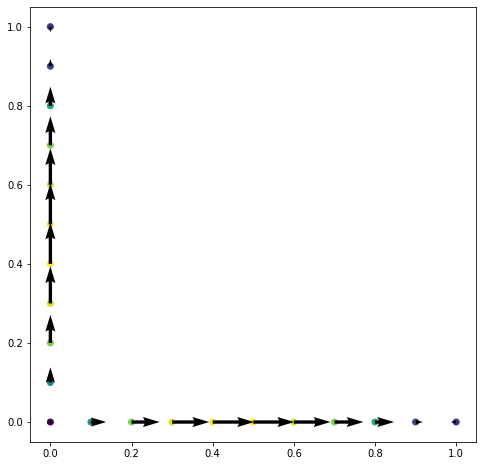

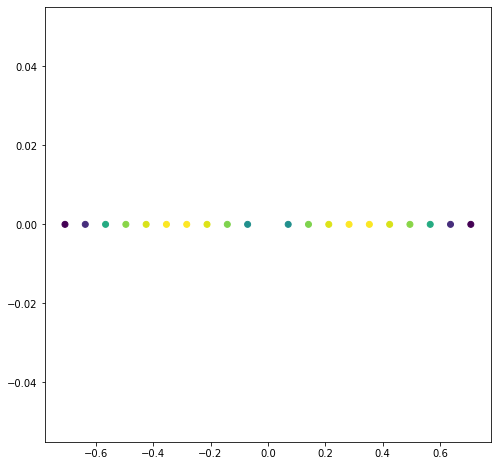

In [ ]:
n_pts = 10
prune_nonzero = True
n_dims = 2

rs = np.zeros((n_dims, n_dims))
for idx in range(n_dims):
  rs[idx] = - 1/n_dims * np.ones((n_dims,))
  rs[idx][idx] = 1/n_dims * (n_dims - 1)

bs = np.zeros((n_dims-1, n_dims))
bs[0] = rs[0] / np.linalg.norm(rs[0])
# b2_dir = rs[1]- np.dot(rs[1], bs[0]) * bs[0]
# bs[1] = b2_dir / np.linalg.norm(b2_dir)
print('bs shape', bs.shape)

proj = np.matmul(np.matmul(bs.T, np.linalg.inv(np.matmul(bs, bs.T))), bs) # n_dims x n_dims

x_branch = np.linspace(0, 1, n_pts+1)
y_branch = np.linspace(0, 1, n_pts+1)
# zero_vals = np.zeros((10,))
# coords = np.asarray([np.concatenate((x_branch, zero_vals)), np.concatenate((zero_vals, y_branch))])

coords_sq = np.asarray(np.meshgrid(x_branch, y_branch))
coords = coords_sq.reshape(2, (n_pts+1) * (n_pts+1))

if prune_nonzero:
  pruned_coords = []
  for idx in range(coords.shape[1]):
    if (coords[:, idx] == 0).any():
      pruned_coords.append(coords[:, idx])
  coords = np.asarray(pruned_coords).T

deflection = np.zeros(coords.shape)
loss = np.zeros(coords.shape[1])
for idx in range(coords.shape[1]):
  deflection[:, idx] = np.asarray([np.tanh(2*coords[0, idx]), np.tanh(2*coords[1, idx])]) 
  loss[idx] = 1/2*np.linalg.norm(coords[:, idx] - deflection[:, idx])**2

plt.figure(figsize=(8,8))
plt.scatter(coords[0], coords[1], c=np.log10(loss+1e-3))
plt.quiver(coords[0], coords[1], deflection[0]-coords[0], deflection[1]-coords[1])

plt.figure(figsize=(8,8))

bs_proj = np.matmul(bs[0], np.matmul(proj, coords))

plt.scatter(bs_proj, np.zeros(bs_proj.shape), c=np.log10(loss))
# for i in range(3):
#   b1_val = np.matmul(b1, np.matmul(proj, rs[i]))
#   b2_val = np.matmul(b2, np.matmul(proj, rs[i]))
#   plt.plot([0, b1_val], [0, b2_val], c='r')

# plot_coordinate = 1.0
# if plot_coordinate != None:
#   plt.xlim(-plot_coordinate, plot_coordinate)
#   plt.ylim(-plot_coordinate, plot_coordinate)

# plt.colorbar()

# b1_def_vals = np.matmul(b1, np.matmul(proj, deflection.T))
# b2_def_vals = np.matmul(b2, np.matmul(proj, deflection.T))

# plt.quiver(b1_vals, b2_vals, b1_def_vals-b1_vals, b2_def_vals-b2_vals)

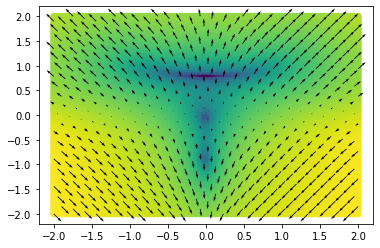

In [ ]:
n_grid = 81
x_range = np.linspace(0, 1, n_grid)
y_range = np.linspace(0, 1, n_grid)
z_range = np.lin
x_vals, y_vals = np.meshgrid(x_range, y_range)
x_vals = x_vals.reshape(n_grid*n_grid)
y_vals = y_vals.reshape(n_grid*n_grid)

losses = np.zeros((len(x_vals),))
deflection = np.zeros((len(x_vals), 2))
for idx in range(len(x_vals)):
  deflection[idx][0] = np.tanh(2*x_vals[idx]*2*0.286*y_vals[idx])
  deflection[idx][1] = np.tanh(2*(1-0.286)*y_vals[idx])
  losses[idx] = 1/2*np.linalg.norm(x_vals[idx] - deflection[idx][0])**2 + 1/2*np.linalg.norm(y_vals[idx] - deflection[idx][1])**2

# x_vals = x_vals.reshape(n_grid, n_grid)
# y_vals = y_vals.reshape(n_grid, n_grid)
# losses = losses.reshape(n_grid, n_grid)

plt.figure()
plt.scatter(x_vals, y_vals, c=np.log10(losses+1e-8))
plt.quiver(x_vals[::11], y_vals[::11], deflection[::11, 0], deflection[::11, 1])

In [ ]:
y_vals.shape

(40, 40)

b1 mag: 0.9999999999999999
b2 mag: 0.9999999999999999
b1 b2 dot: 0.0
A shape (3, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log10


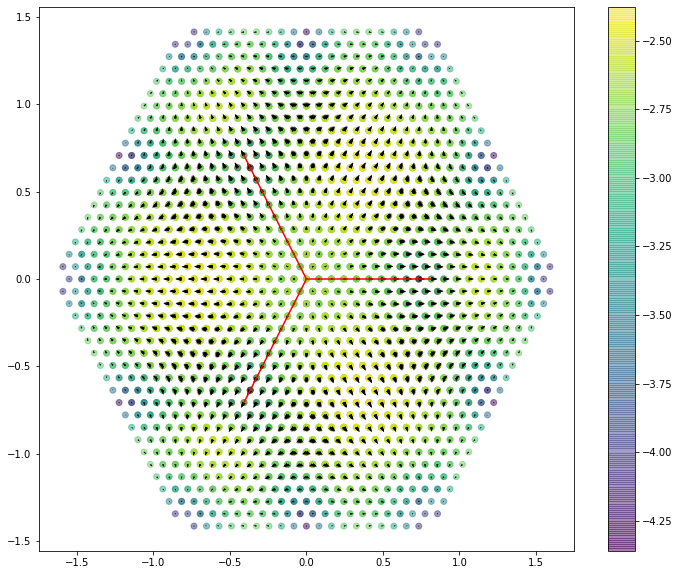

In [ ]:
rs = np.zeros((3, 3))
rs[0] = 1/3 * np.asarray([2, -1, -1])
rs[1] = 1/3 * np.asarray([-1, 2, -1])
rs[2] = 1/3 * np.asarray([-1, -1, 2])

b1 = rs[0] / np.linalg.norm(rs[0])
b2_dir = rs[1]- np.dot(rs[1], b1) * b1
b2 = b2_dir / np.linalg.norm(b2_dir)

print('b1 mag:', np.linalg.norm(b1))
print('b2 mag:', np.linalg.norm(b2))
print('b1 b2 dot:', np.dot(b1, b2))

A = np.array([b1, b2]).T
print('A shape', A.shape)
proj = np.matmul(np.matmul(A, np.linalg.inv(np.matmul(A.T, A))), A.T) # 2 x 3

n_grid = 21
prune_nonzero = False
x_range = np.linspace(-1, 1, n_grid)
y_range = np.linspace(-1, 1, n_grid) 
z_range = np.linspace(-1, 1, n_grid) 
grid_vals = []
for x in x_range:
  for y in y_range:
    for z in z_range:
      if x + y + z < 1 and x + y + z > -1:
        if prune_nonzero and (x==0 or y==0 or z==0):
          grid_vals.append([x, y, z])
        elif not prune_nonzero:
          grid_vals.append([x, y, z])
        
grid_coords_flat = np.asarray(grid_vals)

losses = np.zeros((grid_coords_flat.shape[0],))
deflection = np.zeros((grid_coords_flat.shape[0], 3))

weights = 2*np.asarray([[1,0,0], [0,1,0], [0,0,1]])
bias = 0*np.asarray([-0.5, 0.5, -0.5])
update_val = 0.8

for idx in range(grid_coords_flat.shape[0]):
  deflection[idx]= update_val*grid_coords_flat[idx] + (1-update_val)*np.tanh(np.matmul(weights, grid_coords_flat[idx])+bias)
  losses[idx] = 1/2*np.linalg.norm(grid_coords_flat[idx] - deflection[idx])**2

b1_vals = np.matmul(b1, np.matmul(proj, grid_coords_flat.T))
b2_vals = np.matmul(b2, np.matmul(proj, grid_coords_flat.T))

plt.figure(figsize=(12,10))
plt.scatter(b1_vals, b2_vals, c=np.log10(losses), alpha=0.5)
for i in range(3):
  b1_val = np.matmul(b1, np.matmul(proj, rs[i]))
  b2_val = np.matmul(b2, np.matmul(proj, rs[i]))
  plt.plot([0, b1_val], [0, b2_val], c='r')

plot_coordinate = None
if plot_coordinate != None:
  plt.xlim(-plot_coordinate, plot_coordinate)
  plt.ylim(-plot_coordinate, plot_coordinate)

plt.colorbar()

b1_def_vals = np.matmul(b1, np.matmul(proj, deflection.T))
b2_def_vals = np.matmul(b2, np.matmul(proj, deflection.T))

plt.quiver(b1_vals, b2_vals, b1_def_vals-b1_vals, b2_def_vals-b2_vals)

b1 mag: 0.9999999999999999
b2 mag: 0.9999999999999999
b1 b2 dot: 0.0
A shape (3, 2)


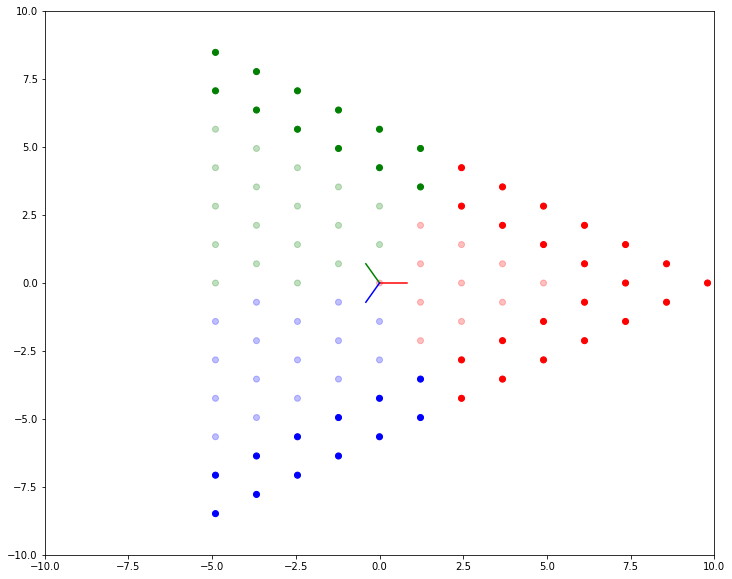

In [ ]:
rs = np.zeros((3, 3))
rs[0] = 1/3 * np.asarray([2, -1, -1])
rs[1] = 1/3 * np.asarray([-1, 2, -1])
rs[2] = 1/3 * np.asarray([-1, -1, 2])

b1 = rs[0] / np.linalg.norm(rs[0])
b2_dir = rs[1]- np.dot(rs[1], b1) * b1
b2 = b2_dir / np.linalg.norm(b2_dir)

print('b1 mag:', np.linalg.norm(b1))
print('b2 mag:', np.linalg.norm(b2))
print('b1 b2 dot:', np.dot(b1, b2))

A = np.array([b1, b2]).T
print('A shape', A.shape)
proj = np.matmul(np.matmul(A, np.linalg.inv(np.matmul(A.T, A))), A.T) # 2 x 3

phrase_len = 12
prune_nonzero = False
class_colors = ['r', 'g', 'b']
x_range = np.arange(0, phrase_len+1, 1)
y_range = np.arange(0, phrase_len+1, 1)
z_range = np.arange(0, phrase_len+1, 1)
grid_vals = []
grid_vals_c = []
grid_vals_filter = []
grid_vals_filter_c = []
filter_val = 1 #(phrase_len)/2
for x in x_range:
  for y in y_range:
    for z in z_range:
      if x + y + z == phrase_len:
        if prune_nonzero and (x==0 or y==0 or z==0):
          grid_vals.append([x, y, z])
          grid_vals_filter.append([x, y, z])
        elif not prune_nonzero:
          grid_vals.append([x, y, z])
          grid_vals_c.append(class_colors[np.argmax([x, y, z])])
          if y <= filter_val or z <= filter_val:
            grid_vals_filter.append([x, y, z])
            grid_vals_filter_c.append(class_colors[np.argmax([x, y, z])])           
        
grid_coords_flat = np.asarray(grid_vals)
grid_coords_filter_flat = np.asarray(grid_vals_filter)

b1_vals = np.matmul(b1, np.matmul(proj, grid_coords_flat.T))
b2_vals = np.matmul(b2, np.matmul(proj, grid_coords_flat.T))
b1_vals_filter = np.matmul(b1, np.matmul(proj, grid_coords_filter_flat.T))
b2_vals_filter = np.matmul(b2, np.matmul(proj, grid_coords_filter_flat.T))

plt.figure(figsize=(12,10))
plt.scatter(b1_vals, b2_vals, c= grid_vals_c, alpha=0.25)
plt.scatter(b1_vals_filter, b2_vals_filter, c=grid_vals_filter_c, alpha=1.0)
for i in range(3):
  b1_val = np.matmul(b1, np.matmul(proj, rs[i]))
  b2_val = np.matmul(b2, np.matmul(proj, rs[i]))
  plt.plot([0, b1_val], [0, b2_val], c=class_colors[i])

plot_coordinate = 10
if plot_coordinate != None:
  plt.xlim(-plot_coordinate, plot_coordinate)
  plt.ylim(-plot_coordinate, plot_coordinate)

b1 mag: 0.9999999999999999
b2 mag: 0.9999999999999999
b1 b2 dot: 0.0
A shape (3, 2)


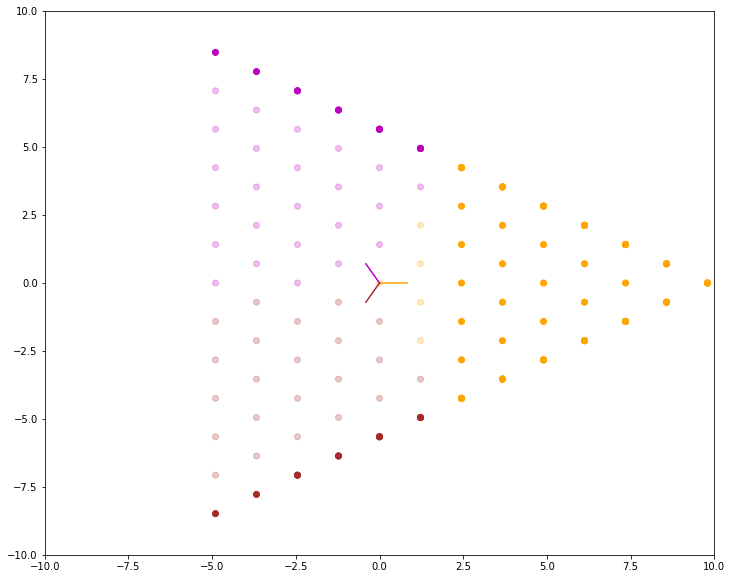

In [ ]:
rs = np.zeros((3, 3))
rs[0] = 1/3 * np.asarray([2, -1, -1])
rs[1] = 1/3 * np.asarray([-1, 2, -1])
rs[2] = 1/3 * np.asarray([-1, -1, 2])

b1 = rs[0] / np.linalg.norm(rs[0])
b2_dir = rs[1]- np.dot(rs[1], b1) * b1
b2 = b2_dir / np.linalg.norm(b2_dir)

print('b1 mag:', np.linalg.norm(b1))
print('b2 mag:', np.linalg.norm(b2))
print('b1 b2 dot:', np.dot(b1, b2))

A = np.array([b1, b2]).T
print('A shape', A.shape)
proj = np.matmul(np.matmul(A, np.linalg.inv(np.matmul(A.T, A))), A.T) # 2 x 3

phrase_len = 12
prune_nonzero = False
class_colors = ['orange', 'm', 'brown']
x_range = np.arange(0, phrase_len+1, 1)
y_range = np.arange(0, phrase_len+1, 1)
z_range = np.arange(0, phrase_len+1, 1)
grid_vals = []
grid_vals_c = []
grid_vals_filter = []
grid_vals_filter_c = []
filter_val = 3
for x in x_range:
  for y in y_range:
    for z in z_range:
      if x + y + z == phrase_len:
        if prune_nonzero and (x==0 or y==0 or z==0):
          grid_vals.append([x, y, z])
          grid_vals_filter.append([x, y, z])
        elif not prune_nonzero:
          grid_vals.append([x, y, z])
          grid_vals_c.append(class_colors[np.argmax([x, y, z])])
          
          # Minimum subtracted value
          min_sub = np.min([y - np.max([y-filter_val, 0]), z - np.max([z-filter_val, 0])])

          y_new = y - min_sub
          z_new = z - min_sub
          x_new = x + 2*min_sub  

          grid_vals_filter.append([x_new, y_new, z_new])
          grid_vals_filter_c.append(class_colors[np.argmax([x_new, y_new, z_new])])           
        
grid_coords_flat = np.asarray(grid_vals)
grid_coords_filter_flat = np.asarray(grid_vals_filter)

b1_vals = np.matmul(b1, np.matmul(proj, grid_coords_flat.T))
b2_vals = np.matmul(b2, np.matmul(proj, grid_coords_flat.T))
b1_vals_filter = np.matmul(b1, np.matmul(proj, grid_coords_filter_flat.T))
b2_vals_filter = np.matmul(b2, np.matmul(proj, grid_coords_filter_flat.T))

plt.figure(figsize=(12,10))
plt.scatter(b1_vals, b2_vals, c= grid_vals_c, alpha=0.25)
plt.scatter(b1_vals_filter, b2_vals_filter, c=grid_vals_filter_c, alpha=1.0)
for i in range(3):
  b1_val = np.matmul(b1, np.matmul(proj, rs[i]))
  b2_val = np.matmul(b2, np.matmul(proj, rs[i]))
  plt.plot([0, b1_val], [0, b2_val], c=class_colors[i])

plot_coordinate = 10
if plot_coordinate != None:
  plt.xlim(-plot_coordinate, plot_coordinate)
  plt.ylim(-plot_coordinate, plot_coordinate)

b1 mag: 0.9999999999999999
b2 mag: 0.9999999999999999
b1 b2 dot: 0.0
A shape (3, 2)


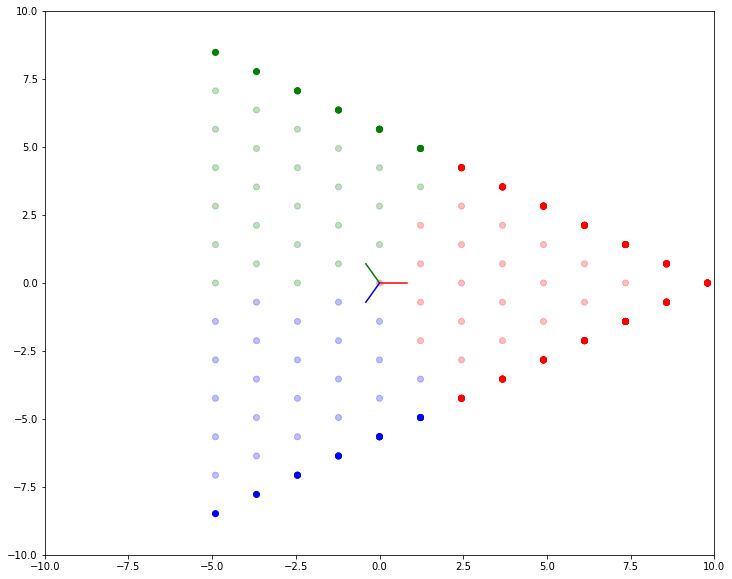

In [ ]:
rs = np.zeros((3, 3))
rs[0] = 1/3 * np.asarray([2, -1, -1])
rs[1] = 1/3 * np.asarray([-1, 2, -1])
rs[2] = 1/3 * np.asarray([-1, -1, 2])

b1 = rs[0] / np.linalg.norm(rs[0])
b2_dir = rs[1]- np.dot(rs[1], b1) * b1
b2 = b2_dir / np.linalg.norm(b2_dir)

print('b1 mag:', np.linalg.norm(b1))
print('b2 mag:', np.linalg.norm(b2))
print('b1 b2 dot:', np.dot(b1, b2))

A = np.array([b1, b2]).T
print('A shape', A.shape)
proj = np.matmul(np.matmul(A, np.linalg.inv(np.matmul(A.T, A))), A.T) # 2 x 3

phrase_len = 12
prune_nonzero = False
class_colors = ['r', 'g', 'b']
x_range = np.arange(0, phrase_len+1, 1)
y_range = np.arange(0, phrase_len+1, 1)
z_range = np.arange(0, phrase_len+1, 1)
grid_vals = []
grid_vals_c = []
grid_vals_filter = []
grid_vals_filter_c = []
filter_val = 6 #(phrase_len)/2
for x in x_range:
  for y in y_range:
    for z in z_range:
      if x + y + z == phrase_len:
        if prune_nonzero and (x==0 or y==0 or z==0):
          grid_vals.append([x, y, z])
          grid_vals_filter.append([x, y, z])
        elif not prune_nonzero:
          grid_vals.append([x, y, z])
          grid_vals_c.append(class_colors[np.argmax([x, y, z])])
          if y <= (phrase_len/2 - filter_val) or z <= (phrase_len/2 - filter_val):
            grid_vals_filter.append([x, y, z])
            grid_vals_filter_c.append(class_colors[np.argmax([x, y, z])])   
          else:
            min_sub = np.min([y - np.max([y-filter_val, 0]), z - np.max([z-filter_val, 0])])

            y_new = y - min_sub
            z_new = z - min_sub
            x_new = x + 2*min_sub  

            grid_vals_filter.append([x_new, y_new, z_new])
            grid_vals_filter_c.append(class_colors[np.argmax([x_new, y_new, z_new])])            
        
grid_coords_flat = np.asarray(grid_vals)
grid_coords_filter_flat = np.asarray(grid_vals_filter)

b1_vals = np.matmul(b1, np.matmul(proj, grid_coords_flat.T))
b2_vals = np.matmul(b2, np.matmul(proj, grid_coords_flat.T))
b1_vals_filter = np.matmul(b1, np.matmul(proj, grid_coords_filter_flat.T))
b2_vals_filter = np.matmul(b2, np.matmul(proj, grid_coords_filter_flat.T))

plt.figure(figsize=(12,10))
plt.scatter(b1_vals, b2_vals, c= grid_vals_c, alpha=0.25)
plt.scatter(b1_vals_filter, b2_vals_filter, c=grid_vals_filter_c, alpha=1.0)
for i in range(3):
  b1_val = np.matmul(b1, np.matmul(proj, rs[i]))
  b2_val = np.matmul(b2, np.matmul(proj, rs[i]))
  plt.plot([0, b1_val], [0, b2_val], c=class_colors[i])

plot_coordinate = 10
if plot_coordinate != None:
  plt.xlim(-plot_coordinate, plot_coordinate)
  plt.ylim(-plot_coordinate, plot_coordinate)

In [ ]:
correct = 0
max = 25
trials = 100000
n_classes = 5
for _ in range(trials):
  score = np.zeros((n_classes,))
  for class_idx in range(n_classes):
    score[class_idx] = np.random.randint(max+1)
  if np.sum(score) <= max:
    correct += 1

print('Percent correct:', correct/trials)

Percent correct: 0.01235


In [ ]:
correct = 0
max = 25
trials = 10
n_classes = 10
for _ in range(trials):
  score = np.random.randint(max+1, size=(n_classes,))
  score.sort()
  score = np.insert(score, 0, 0)
  score = np.insert(score, score.shape[0], max)
  score_diffs =  score[1:] - score[:-1]
  print('Scores:', score_diffs[:-1], 'Sum:', np.sum(score_diffs[:-1]))

Scores: [ 1 11  0  2  2  2  0  3  0  1] Sum: 22
Scores: [3 0 2 2 3 3 1 1 5 3] Sum: 23
Scores: [0 2 1 3 4 0 2 6 7 0] Sum: 25
Scores: [2 3 4 0 0 5 0 1 2 2] Sum: 19
Scores: [1 4 1 3 1 0 1 3 5 0] Sum: 19
Scores: [1 1 0 3 6 0 3 0 4 5] Sum: 23
Scores: [2 5 1 0 2 1 1 4 7 2] Sum: 25
Scores: [ 0  1  1  0  1  0  2  5 12  1] Sum: 23
Scores: [0 2 4 7 3 1 1 1 1 1] Sum: 21
Scores: [1 7 2 0 1 1 8 1 2 0] Sum: 23


In [ ]:
def n_scores(n_classes, max):
  return np.prod([n + 1 + max for n in range(0,n_classes)])/np.prod([n + 1 for n in range(n_classes)])

def index_to_score(index, n_classes, max_val):
  score = np.zeros((n_classes,))
  max = max_val
  n = n_classes - 1
  for score_idx in range(n_classes):
    if score_idx == n_classes - 1:
      score[score_idx] = index
    else:
      current_val = 0
      val_found = False
      while not val_found:
        if index < n_scores(n, max):
          val_found = True
          score[score_idx] = current_val
          n -= 1
        else:
          index -= n_scores(n, max) - 1
          max -= 1
          current_val += 1

  return score

print('Score:', index_to_score(5,2,4))

Score: [0. 1.]


In [ ]:
n_scores(1,4)

5.0